In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [39]:
img = cv2.imread('wiki.jpg', 0)

In [40]:
overlay = img.copy()

In [41]:
output = img.copy()

In [42]:
cv2.rectangle(overlay, (500, 500), (600, 650), (255, 255, 0), 2)

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

In [43]:
cv2.rectangle(overlay, (400, 400), (450, 450), (255, 255, 0), 2)

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

In [37]:
output = cv2.addWeighted(overlay, 0.5, output, 0.5, 0)

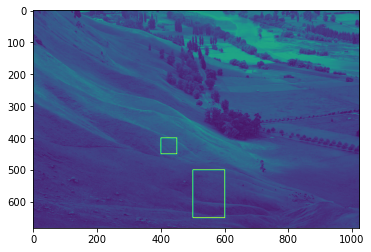

In [44]:
plt.imshow(overlay)

In [32]:
cv2.addWeighted?

In [6]:
img.max()

208

In [7]:
img.min()

114

In [8]:
hist, bins = np.histogram(img.flatten(), 256, [0,256])

In [35]:
hist.shape

(256,)

In [36]:
hist

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     1,    12,
          19,    49,    93,   220,   488,  1061,  1747,  2160,  2718,
        3259,  4039,

In [9]:
cdf = hist.cumsum()

In [17]:
cdf.shape

(256,)

In [18]:
img.size

699392

In [10]:
cdf_normalized = cdf * hist.max()/ cdf.max()

In [11]:
cdf_normalized.max()

28701.0

In [12]:
cdf_normalized.min()

0.0

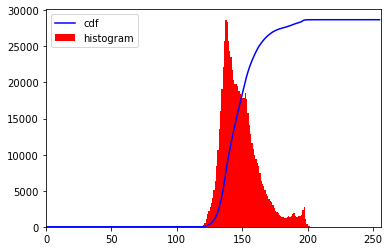

In [13]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [15]:
np.ma.masked_equal?

In [16]:
cdf

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [34]:
cdf.shape

(256,)

In [19]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [20]:
img2 = cdf[img]

In [21]:
img2.shape

(683, 1024)

In [46]:
img-img.min()

array([[13, 31, 35, ..., 54, 53, 52],
       [51, 38, 29, ..., 54, 55, 54],
       [57, 31, 26, ..., 42, 40, 37],
       ...,
       [33, 18, 20, ..., 32, 31, 30],
       [32, 16, 18, ..., 32, 31, 30],
       [31, 14, 15, ..., 32, 31, 30]], dtype=uint8)

In [49]:
img.max()

208

In [50]:
img.min()

114

In [51]:
255 / (img.max() - img.min())

2.7127659574468086

In [54]:
(img - img.min()) * 2.7

array([[ 35.1,  83.7,  94.5, ..., 145.8, 143.1, 140.4],
       [137.7, 102.6,  78.3, ..., 145.8, 148.5, 145.8],
       [153.9,  83.7,  70.2, ..., 113.4, 108. ,  99.9],
       ...,
       [ 89.1,  48.6,  54. , ...,  86.4,  83.7,  81. ],
       [ 86.4,  43.2,  48.6, ...,  86.4,  83.7,  81. ],
       [ 83.7,  37.8,  40.5, ...,  86.4,  83.7,  81. ]])

In [60]:
img.dtype

dtype('uint8')

In [62]:
(img.astype('uint32') - img.min()) * 255 / (img.max() - img.min())

array([[ 35.26595745,  84.09574468,  94.94680851, ..., 146.4893617 ,
        143.77659574, 141.06382979],
       [138.35106383, 103.08510638,  78.67021277, ..., 146.4893617 ,
        149.20212766, 146.4893617 ],
       [154.62765957,  84.09574468,  70.53191489, ..., 113.93617021,
        108.5106383 , 100.37234043],
       ...,
       [ 89.5212766 ,  48.82978723,  54.25531915, ...,  86.80851064,
         84.09574468,  81.38297872],
       [ 86.80851064,  43.40425532,  48.82978723, ...,  86.80851064,
         84.09574468,  81.38297872],
       [ 84.09574468,  37.9787234 ,  40.69148936, ...,  86.80851064,
         84.09574468,  81.38297872]])

In [63]:
img3 = ((img.astype('uint32') - img.min()) * 255 / (img.max() - img.min())).astype('uint8')

In [65]:
img3.min()

0

In [66]:
img3.max()

255

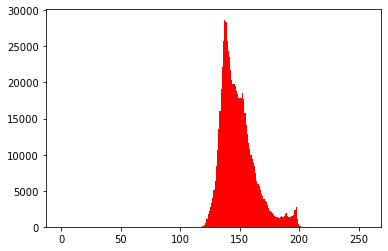

In [69]:
ax = plt.hist(img.flatten(),256,[0,256], color = 'r')

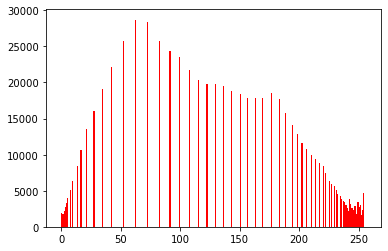

In [70]:
ax = plt.hist(img2.flatten(),256,[0,256], color = 'r')

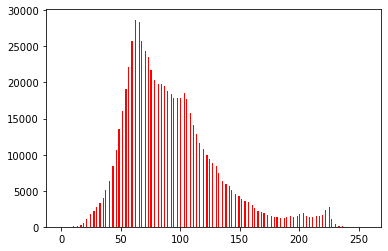

In [68]:
ax = plt.hist(img3.flatten(),256,[0,256], color = 'r')

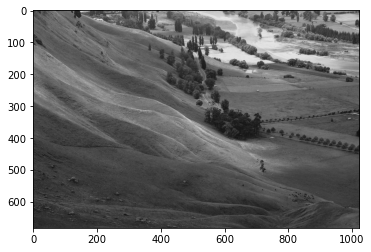

In [29]:
plt.imshow(img, cmap='gray')

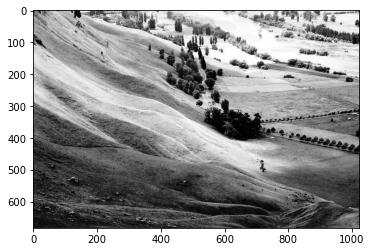

In [30]:
plt.imshow(img2, cmap='gray')

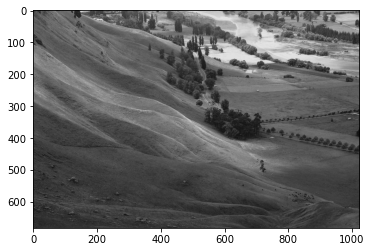

In [64]:
plt.imshow(img3, cmap='gray')

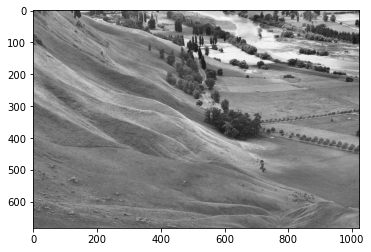

In [78]:
plt.imshow(img4, cmap='gray')

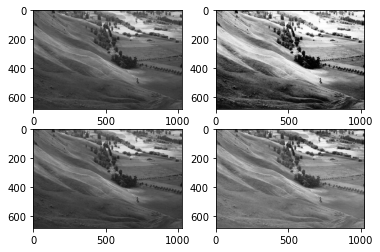

In [81]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img, cmap='gray')
ax[0, 1].imshow(img2, cmap='gray')
ax[1, 0].imshow(img3, cmap='gray')
ax[1, 1].imshow(img4, cmap='gray')

In [32]:
img

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

In [44]:
img3.min()

0

In [45]:
img3.max()

2

In [37]:
cdf_m.min()

0.0

In [38]:
cdf_m.max()

255.0

In [39]:
cdf_m

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, 0.0, 0.00036460291882509213,
                   0.004739837944726198, 0.011667293402402948,
                   0.02953283642483246, 0.06344090787556603,
                   0.1436535500170863, 0.32157977440373126,
                   0.708423471277154, 1.3453847704645898,
                   2.132927075126789, 3.123917808493389,
                   4.312158720944365, 5.78478

In [73]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))

In [74]:
img4 = clahe.apply(img)

In [75]:
img4.shape

(683, 1024)

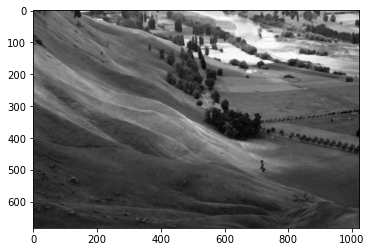

In [83]:
plt.imshow(cv2.medianBlur(img, 5), cmap='gray')

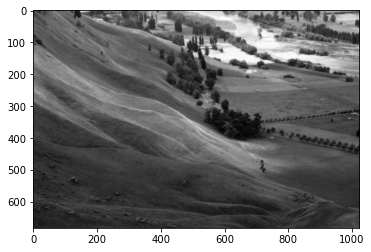

In [85]:
plt.imshow(cv2.GaussianBlur(img, (5,5), 0), cmap='gray')

In [159]:
test = np.random.randint(0, 255, size=(8, 8)).astype('uint8')

In [160]:
test

array([[131, 233,  76, 112, 171,   3,  55, 133],
       [186,  92, 156, 202, 186, 225, 103,  59],
       [ 69, 211, 241, 179, 206,  86,  55, 103],
       [ 67, 165, 118,  94, 207, 219, 199, 172],
       [206, 227, 205, 124, 252,  50,  75,  98],
       [118, 180, 244, 247, 214,  76, 179,  13],
       [157,   0,  85,  87, 204,  49,  90,  93],
       [203, 107, 185,  22, 148, 102,  29, 135]], dtype=uint8)

In [163]:
thresh = cv2.threshold(test, 100, 255, cv2.THRESH_BINARY)

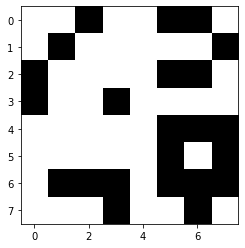

In [164]:
plt.imshow(thresh[1], cmap='gray')

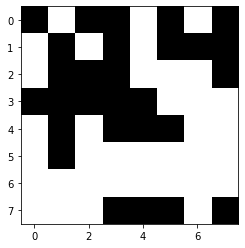

In [114]:
plt.imshow(cv2.threshold(test, 100, 255, cv2.THRESH_BINARY)[1], cmap='gray')

In [129]:
thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

In [130]:
thresh

(150.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [165]:
contours, hierarchy = cv2.findContours(thresh[1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [166]:
contours

[array([[[7, 7]]], dtype=int32),
 array([[[6, 5]]], dtype=int32),
 array([[[0, 0]],
 
        [[0, 1]],
 
        [[1, 2]],
 
        [[1, 3]],
 
        [[0, 4]],
 
        [[0, 7]],
 
        [[2, 7]],
 
        [[1, 7]],
 
        [[0, 6]],
 
        [[1, 5]],
 
        [[3, 5]],
 
        [[4, 6]],
 
        [[4, 7]],
 
        [[5, 7]],
 
        [[4, 6]],
 
        [[4, 4]],
 
        [[5, 3]],
 
        [[7, 3]],
 
        [[7, 2]],
 
        [[6, 1]],
 
        [[7, 0]],
 
        [[6, 1]],
 
        [[5, 1]],
 
        [[4, 0]],
 
        [[3, 0]],
 
        [[2, 1]],
 
        [[1, 0]]], dtype=int32)]

In [167]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

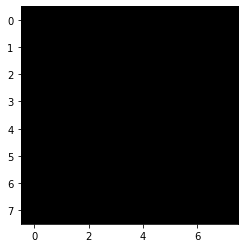

In [169]:
plt.imshow(cv2.threshold(cv2.drawContours(test, contours, 1, (0,255,0), 3), 100, 255, cv2.THRESH_BINARY)[1], cmap='gray')

In [141]:
x, y, h, w = cv2.boundingRect(contours[0])

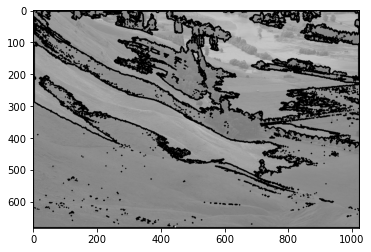

In [145]:
plt.imshow(cv2.rectangle(img, (x, y), (x+h, y+w), (255, 0, 0), 2), cmap='gray')

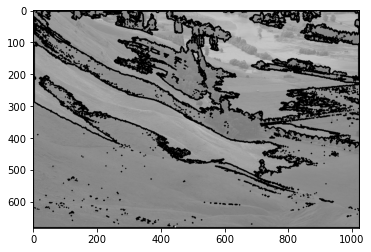

In [146]:
plt.imshow(img, cmap='gray')

In [147]:
x, y, h, w

(444, 678, 2, 1)

In [140]:
cv2.boundingRect?